In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statistics import mean
import math
import numpy.random as rd

In [13]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

In [14]:
# it is the inverse of CDF of g
def G_inverse(u, α):
    return np.power(u, 1/α)

# dominating PDF
def g(x, α):
    return α*(x**(α-1))

# target PDF
def f(x, α, γ):
    return ((x**(α-1))*(math.exp(1)**(-x)))/γ

def acc_rej(N, α, c, γ):
    
    # generating number with density g(x)
    num = 10*N
    U1 = Uniform_Distribution(31, 2**60, 101, 3,num)
    X = []
    for i in range(num):
        X.append(G_inverse(U1[i], α))    
    
# generated for accepting value with a give probability     
    U2 = Uniform_Distribution(19, 2**50, 65, 9,num)
    j = 0
    out = np.zeros(N)
    for i in range(N):
        while True:
            x = X[j]
            u2 = U2[j]
            j = j + 1
# accepting the generated value with prob f(x)/c*g(x)
            if c*g(x, α)*u2 <= f(x,α,γ):
                out[i] = x
                break
    return out

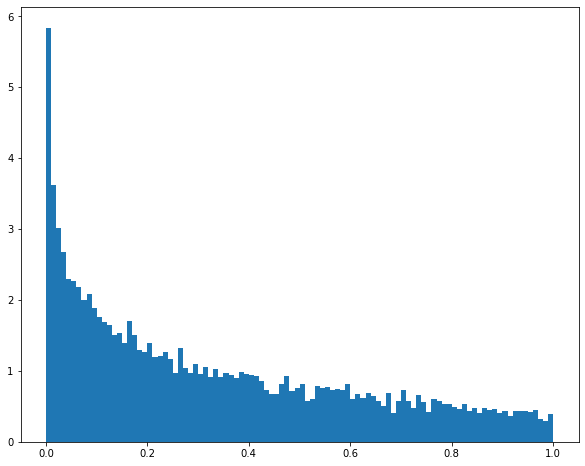

In [20]:
α = 0.7
γ = 0.988064
X = acc_rej(10**4, α, 1/(α*γ), γ)

# making histogram of f(x) showing density on y-axis
plt.figure(figsize=(10, 8))
plt.hist(X, bins = 100, density = True)
plt.show()

In [21]:
math.gamma(5)

24.0